# Random Forest (activation of person)

## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
feature_name_df = pd.read_csv('./human_activity_features.txt',
                             sep = '\s+',
                             header = None,
                             names = ['column_index', 'column_name'])

In [3]:
#feature_name_df.iloc[:, 1]
feature_name_df.iloc[:, 1].values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [4]:
feature_name = feature_name_df.iloc[:,1].values.tolist()

In [5]:
X_train = pd.read_csv('./largedata/human_activity_X_train.txt',sep = '\s+', header=None)
X_train.columns = feature_name
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [6]:
X_test = pd.read_csv('./human_activity_X_test.txt', sep='\s+', header = None)
X_test


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [7]:
X_test.columns = feature_name

In [8]:
y_train = pd.read_csv('./human_activity_y_train.txt', sep='\s+', header=None, names = ['action'])
y_test = pd.read_csv('./human_activity_y_test.txt', sep='\s+', header = None, names = ['action'])

In [9]:
y_train['action'].value_counts()
X_train.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroMean,gravityMean)        0
angle(tBodyGyroJerkMean,gravityMean)    0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
Length: 561, dtype: int64

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
import numpy as np

In [11]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rf_clf.fit(X_train, y_train)

C:\Users\JMDESKTOP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\JMDESKTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
pred = rf_clf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9046487953851374


## 성능 높이기

In [15]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8, 16, 20]
}

In [16]:
rf_clf = RandomForestClassifier(n_jobs = 10)

In [17]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, n_jobs = 10)

In [18]:
warnings.filterwarnings('ignore')

In [19]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=10,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             

In [20]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 16,
 'n_estimators': 100}

In [21]:
grid_cv.best_score_

0.9205658324265505

## 컬럼중요도

In [24]:
rf_clf1 = RandomForestClassifier(n_estimators=300,
                                max_depth=10,
                                min_samples_leaf=8,
                                min_samples_split=8)
rf_clf1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
pred = rf_clf1.predict(X_test)
pred

array([5, 5, 5, ..., 2, 2, 1], dtype=int64)

In [27]:
accuracy_score(y_test,pred)

0.9239904988123515

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances_values

array([1.19159967e-04, 1.54339112e-04, 4.49628368e-05, 8.13556994e-03,
       3.49652593e-04, 3.00759096e-04, 2.91315572e-03, 2.74331255e-04,
       2.92432038e-04, 1.04551271e-02, 1.07508829e-04, 1.22278729e-04,
       2.03092313e-04, 9.86763174e-05, 8.54991449e-05, 3.21993673e-04,
       6.02653997e-03, 2.55662744e-04, 3.41826260e-04, 1.22135694e-03,
       1.66677782e-04, 2.98658220e-04, 9.83694590e-04, 1.46252644e-04,
       2.31231169e-04, 1.09701707e-04, 1.01955717e-04, 5.26093336e-05,
       1.28850599e-04, 7.43866569e-05, 4.34995514e-05, 4.30313762e-05,
       5.03249579e-05, 6.57736351e-05, 6.30460172e-05, 3.98704165e-05,
       1.64862209e-04, 4.60131732e-03, 1.23771685e-03, 2.96994821e-03,
       2.43848386e-02, 2.25714540e-02, 1.07613231e-02, 1.19941861e-03,
       1.00388943e-03, 5.98348531e-04, 1.50802311e-03, 9.96983693e-04,
       4.61002741e-04, 2.86052441e-02, 2.44693639e-02, 8.90944893e-03,
       2.84270960e-02, 2.25059756e-02, 1.31094625e-02, 5.06889619e-03,
      

In [33]:
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_importances

tBodyAcc-mean()-X                       0.000119
tBodyAcc-mean()-Y                       0.000154
tBodyAcc-mean()-Z                       0.000045
tBodyAcc-std()-X                        0.008136
tBodyAcc-std()-Y                        0.000350
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000351
angle(tBodyGyroJerkMean,gravityMean)    0.000410
angle(X,gravityMean)                    0.031437
angle(Y,gravityMean)                    0.026233
angle(Z,gravityMean)                    0.011902
Length: 561, dtype: float64

In [35]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
ftr_top20

tGravityAcc-energy()-X             0.036253
angle(X,gravityMean)               0.031437
tGravityAcc-max()-X                0.028605
tGravityAcc-min()-X                0.028427
angle(Y,gravityMean)               0.026233
tGravityAcc-max()-Y                0.024469
tGravityAcc-mean()-X               0.024385
tGravityAcc-mean()-Y               0.022571
tGravityAcc-min()-Y                0.022506
tGravityAcc-energy()-Y             0.020747
fBodyAccJerk-bandsEnergy()-1,16    0.015999
tGravityAcc-min()-Z                0.013109
angle(Z,gravityMean)               0.011902
tGravityAcc-mean()-Z               0.010761
tBodyAcc-max()-X                   0.010455
fBodyAccJerk-bandsEnergy()-1,24    0.010183
tGravityAcc-arCoeff()-Y,1          0.009980
tGravityAccMag-std()               0.009592
tGravityAcc-arCoeff()-Z,1          0.009278
fBodyAccJerk-mad()-X               0.009114
dtype: float64

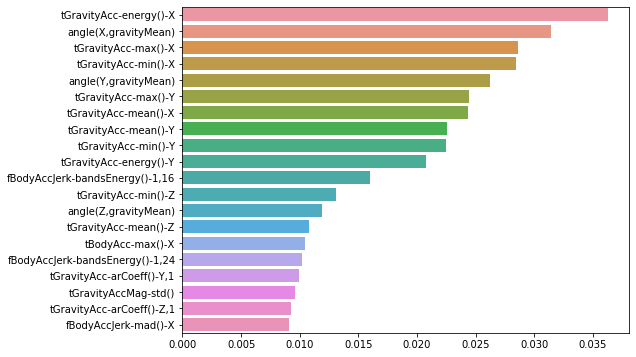

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()